<a href="https://colab.research.google.com/github/robson-rsp/datascience/blob/main/clustering/content_based_movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''%pip install ipython-autotime  --upgrade
%pip install matplotlib        --upgrade
%pip install pandas            --upgrade
%pip install scikit-learn      --upgrade
%pip install seaborn           --upgrade'''

'%pip install ipython-autotime  --upgrade\n%pip install matplotlib        --upgrade\n%pip install pandas            --upgrade\n%pip install scikit-learn      --upgrade\n%pip install seaborn           --upgrade'

In [ ]:
from google.colab import drive, files
import pandas as pd
import warnings

drive.mount('/content/drive', force_remount=True)
warnings.filterwarnings("ignore")
%load_ext autotime

Mounted at /content/drive
time: 626 µs (started: 2023-04-19 13:59:06 +00:00)


In [ ]:
links   = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/links.csv', encoding='utf-8')
movies  = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/movies.csv', encoding='utf-8')
ratings = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/ratings.csv', encoding='utf-8')
tags    = pd.read_csv('/content/drive/MyDrive/datasets/movielens-movies/tags.csv', encoding='utf-8')

time: 101 ms (started: 2023-04-19 13:59:06 +00:00)


# EDA

## Links dataframe

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


time: 9.32 ms (started: 2023-04-19 13:59:06 +00:00)


In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
time: 8.4 ms (started: 2023-04-19 13:59:06 +00:00)


Verificando quais atributos têm valores NaN.

In [ ]:
for col in links.columns:
  print(f'{col}: {links[col].hasnans}')

movieId: False
imdbId: False
tmdbId: True
time: 2.34 ms (started: 2023-04-19 13:59:06 +00:00)


## Movies dataframe

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


time: 8.54 ms (started: 2023-04-19 13:59:06 +00:00)


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
time: 7.91 ms (started: 2023-04-19 13:59:06 +00:00)


Verificando quais atributos têm valores NaN.

In [ ]:
for col in movies.columns:
  print(f'{col}: {movies[col].hasnans}')

movieId: False
title: False
genres: False
time: 6.83 ms (started: 2023-04-19 13:59:06 +00:00)


## Ratings dataframe

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


time: 10.1 ms (started: 2023-04-19 13:59:06 +00:00)


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
time: 18.3 ms (started: 2023-04-19 13:59:06 +00:00)


Verificando quais atributos têm valores NaN.

In [ ]:
for col in ratings.columns:
  print(f'{col}: {ratings[col].hasnans}')

userId: False
movieId: False
rating: False
timestamp: False
time: 5.71 ms (started: 2023-04-19 13:59:06 +00:00)


## Tags dataframe

In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


time: 8.06 ms (started: 2023-04-19 13:59:06 +00:00)


In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
time: 8.98 ms (started: 2023-04-19 13:59:06 +00:00)


Verificando quais atributos têm valores NaN.

In [ ]:
for col in tags.columns:
  print(f'{col}: {tags[col].hasnans}')

userId: False
movieId: False
tag: False
timestamp: False
time: 6.58 ms (started: 2023-04-19 13:59:06 +00:00)


## Ratings e Tag dataframes


Vou checar a quantidade de usuários diferentes em 'ratings' e 'tag'.

In [ ]:
print(len(ratings['userId'].unique()))
print(len(tags['userId'].unique()))

610
58
time: 1.84 ms (started: 2023-04-19 13:59:06 +00:00)


Pelo visto nem todos os usuários aplicaram tags aos filmes que assistiram, mas não acredito que isso será um problema.

# Train/Test split

Como a tarefa não é supervisionada, mas sim de agrupamento, não há necessidade de se fazer essa separação.

# Feature engineering

As transformações que farei nos conjuntos de dados são tão simples que não vou usar classes transformadoras nem pipelines neste projeto.

A principal ideia é formar um **conjunto de dados de filmes** onde os gêneros serão as colunas, e os filmes, as linhas. Essa matriz será usada para formar o **vetor de perfil do usuário** a partir dos filmes que ele já assistiu. Com esse vetor será possível estipular a nota de todos os outros filmes que o usuário ainda não assistiu. Assim, basta ordenarmos de forma decrescente os filmes em relação as suas possíveis notas e recomendarmos um número x de filmes.

Eu ia capturar as tags atribuídas aos filmes e combiná-las com 'genres', mas notei que os usuários estavam atribuindo tags completamente fora do contexto dos filmes. Por exemplo, o filme Toy Story tinha tags como: 'Al Pacino', 'Heroic Bloodshed', 'mafia', 'gangster', entre outras. Pesquisando na internet, descobri que uma frase dita pelo personagem Buzz Lightyear(Toy Story) e outra de Tony Montana(Pacino - Scarface) participaram de uma enquete de uma rádio britânica sobre as melhores frases da história do cinema. Provavelmente essas tags vieram dali, mas não têm nada a ver com o filme Toy Story. Isso caracteriza ruído e para evitar isso não apenas neste filme, mas em todo o conjunto de dados resolvi usar apenas 'genres' para formar a matriz de dados de filmes.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

time: 841 ms (started: 2023-04-19 13:59:06 +00:00)


**Etapa ##:** Remover os nomes dos filmes pois isso não será necessário. Aqui, também faço alguns ajustes finais, como:

*   Substituir o '|' por um espaço em branco
*   Transformar todas as strings em letras minúsculas
*   Formatar os espaços em branco


In [ ]:
movies['genres'] = movies['genres'].str.replace('|', ' ')
movies['genres'] = movies['genres'].str.lower()
movies['genres'] = movies['genres'].str.replace(r'\s{2,}', ' ', regex=True)

time: 30 ms (started: 2023-04-19 13:59:07 +00:00)


# Modeling
Neste projeto não vou usar modelos tradicionais de Machine Learning. Vou usar uma técnica de médias ponderadas e operações matricais que vou descrevendo etapa por etapa. Farei dessa forma pois vou me basear nos filmes que um usuário assistiu para recomendar outro baseado nos seus gostos. 

Outra forma de se fazer recomendações é escolher um filme, e baseado nos seus gêneros, recomendar outros que mais se assemelham ao seu. Neste caso, se faz necessário algum algoritmo para calcular a semelhança de cossenos entre os vetores que representam cada filme. Como já fiz algo parecido em outro projeto de recomendação de livros, prefiro utilizar outra abordagem neste projeto.

**Etapa ##:** Selecionar um usuário aleatório com todos os filmes os quais ele assistiu.

In [ ]:
user_id = ratings.sample(1)['userId'].values[0]
mask  = ratings['userId'] == user_id
user = ratings[mask]

time: 21.5 ms (started: 2023-04-19 13:59:07 +00:00)


**Etapa ##:** Criar uma matriz contendo dos filmes que o usuário assistiu.

In [ ]:
mask = movies['movieId'].isin(user['movieId'])
user_movies = movies[mask]

,movieId,title,genres
0,1,Toy Story (1995),adventure animation children comedy fantasy
1,2,Jumanji (1995),adventure children fantasy
5,6,Heat (1995),action crime thriller
10,11,"American President, The (1995)",comedy drama romance
20,21,Get Shorty (1995),comedy crime thriller
...,...,...,...
6357,49524,"Nativity Story, The (2006)",drama
6358,49530,Blood Diamond (2006),action adventure crime drama thriller war
6369,49910,Freedom Writers (2007),drama
6377,50068,Letters from Iwo Jima (2006),drama war


time: 35.4 ms (started: 2023-04-19 13:59:07 +00:00)


**Etapa ##:** Criar uma matriz binária onde cada coluna será um gênero de filme e cada linha será um filme que o usuário assistiu.

0.   Filme não pertence ao gênero
1.   Filme pertence ao gênero



In [ ]:
cv = CountVectorizer(binary=True)
movies_matrix = cv.fit_transform(user_movies['genres']).toarray()

time: 15.4 ms (started: 2023-04-19 14:14:59 +00:00)


**Etapa ##:** Multiplicar a nota de cada filme pela linha correspente a ele na matriz de filmes.
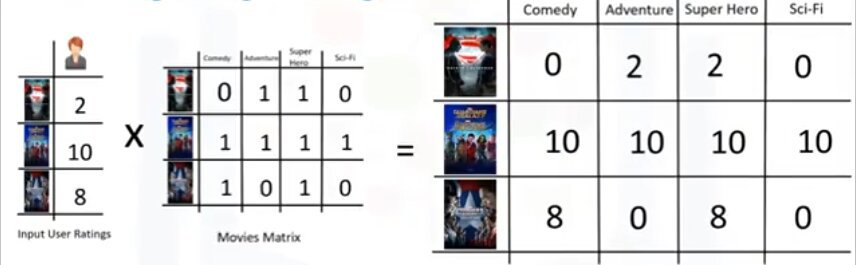

In [ ]:
user_ratings = user['rating'].values
weighted_matrix = np.multiply(user_ratings.reshape(-1, 1), movies_matrix)

time: 1.07 ms (started: 2023-04-19 14:15:03 +00:00)


**Etapa ##:** Fazer o somatório das notas por gênero. O resultado será um vetor com o somatório das notas de cada gênero de filme que o usuário assistiu.

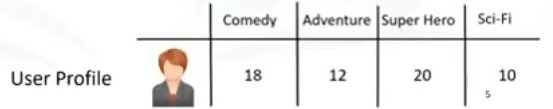

In [ ]:
user_profile = np.sum(weighted_matrix, axis=0)

time: 1.59 ms (started: 2023-04-19 14:22:16 +00:00)


**Etapa ##:** Normalizar o vetor.

In [ ]:
total_ratings = np.sum(user_profile)
user_profile = user_profile / total_ratings

time: 1.38 ms (started: 2023-04-19 14:25:34 +00:00)
